# Visualizing NFL Home Game Wins and Attendance

Data Sources: Espn.com

## Objective

The objective of the research project is to demonstrate visualization techniques to represent relationship between data points.  

### Research Question
Can we identify the most loyal fans in a season in the NFL?  What does the relationship look like between home wins and home game attendance per NFL team in 2019? Can we use this relationship to identify other insights such as the presence of homefield advantage? 



### Method

Create a weighted scatter plot which plots the relationship between the two arrays.  Then, analyzie the relationship between the two datapoints

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # to make plots more appealing
%matplotlib notebook

In [15]:
attn  = pd.read_excel('Avg Attendance.xlsx', skiprows=1) # read in data
wins = pd.read_excel('Home Team Wins.xlsx', skiprows=7)
wins['Win %'] = round(wins['Win %'] * 100)
w = wins.iloc[:,:3]
a = attn.iloc[:,:6].drop('RK', axis =1)
r_teams = list(w['Team'])
o_teams = list(a['TEAM'])
mis = []
for team in r_teams:
    if team not in o_teams:
        mis.append(team)
df = a.merge(w, left_on='TEAM', right_on='Team').drop('Team',axis=1)

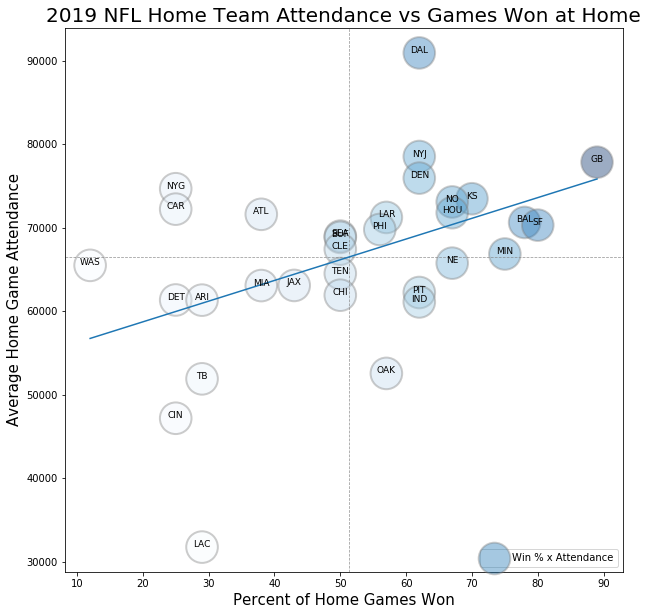

In [14]:
y = df['AVG']
x = df['Win %']
ym = df['AVG'].mean()
xm = df['Win %'].mean()
names = list(df['Unnamed: 2'])
z = x*y
fig = plt.figure(figsize=(10,10))
# scatter plot specifications for color, alignment, and size
plt.scatter(x, y, s=1000, c=(x*y)**1.5, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2,label='Win % x Attendance')
for i, txt in enumerate(names):
    plt.annotate(txt, (x[i], y[i]), ha='center', size=9)
plt.xlabel("Percent of Home Games Won", size=15)
plt.ylabel("Average Home Game Attendance",size=15)
plt.title("2019 NFL Home Team Attendance vs Games Won at Home", size=20)
hl = plt.axhline(y=ym, color='grey', linestyle='--', linewidth = .75, alpha=0.8) 
vl = plt.axvline(x=xm, color='grey', linestyle='--', linewidth = .75, alpha=0.8) 
plt.legend(loc=4)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.savefig('NFL.png')

#### Correlation Coeffcient

In [5]:
c = np.corrcoef(x,y)
c[1][0]

0.4547377124645382

## Conclusions

In analyzing the graph, we can see there apppears to be a slight positive relationship between the number of fans at the game and the outcome of the game, earning a linear correlation coefficient of 0.45.  Their correlation does not define the causation pattern (i.e. does A cause B, B cause A, or other) but defines that the movement of each data pount are related to one another. 

In addition, the plotted points reveal several other insights.  There is clustering near the best fit line, however, several outliers emerge.  Los Angeles and Dallas alone appear to very far from the best fit line, however, their quadrant location follows the trend whereas their winning percentages correspond to expected average home game attendances.  Points in the quadrants in the top left and bottom right are the points that appear most out of line, however, their deviation from the best fit line is small and remain close to the line.

So, can we infer which fan bases are the "best"? Obviously this is highly subjective, however, we can make the argument that fans who cheer for teams above the mean attendance of the league are of the most engaged fans.  If we also assume that fans in fact enjoy winning than losing, we can conclude fans of teams in the top left quadrant, where the teams win below the mean and have attendance above the mean have the most loyal fans, thus, making them candidates for the "best" fans in the league (for the top right quadrant, while winning a lot of games, it is more admirable to cheer during the down years).  In particular, we tip our hats to The New York Giants, Carolina Panthers, and Atlanta Falcons for weathering a challenging 2019 campaign and award them as some of the best fans in the whole league.  